In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from google.colab import files
import io

In [3]:
files = files.upload()
df = pd.read_csv(io.BytesIO(files['clean_carprice.csv']))

Saving clean_carprice.csv to clean_carprice.csv


In [4]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,aspiration-std,aspiration-turbo,nofdoors-four,nofdoors-two,diesel,gas,engine_location-front,engine_location-rear
0,0,3,115,alfa-romero,convertible,rwd,88.6,0.413433,0.324786,0.083333,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,1,0,1,1,0
1,1,3,115,alfa-romero,convertible,rwd,88.6,0.413433,0.324786,0.083333,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,1,0,1,1,0
2,2,1,115,alfa-romero,hatchback,rwd,94.5,0.449254,0.444444,0.383333,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,1,0,1,1,0
3,3,2,164,audi,sedan,fwd,99.8,0.529851,0.504274,0.541667,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,1,0,0,1,1,0
4,4,2,164,audi,sedan,4wd,99.4,0.529851,0.521368,0.541667,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,1,0,0,1,1,0


## Exploring the data

In [7]:
df.describe(include="all")

,Unnamed: 0,symboling,normalized-losses,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,aspiration-std,aspiration-turbo,nofdoors-four,nofdoors-two,diesel,gas,engine_location-front,engine_location-rear
count,201.000000,201.000000,201.000000,201,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,NaN,22,5,3,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,toyota,sedan,fwd,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,32,94,118,NaN,NaN,NaN,NaN,NaN,145,157,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,100.000000,0.840796,120.711443,NaN,NaN,NaN,98.797015,0.494045,0.477697,0.497222,2555.666667,NaN,NaN,126.875622,NaN,3.330299,3.257562,10.164279,103.313433,5118.407960,25.179104,30.686567,13207.129353,0.820896,0.179104,0.572139,0.427861,0.099502,0.900498,0.985075,0.014925
std,58.167861,1.254802,32.111623,NaN,NaN,NaN,6.066366,0.183913,0.179613,0.203985,517.296727,NaN,NaN,41.546834,NaN,0.268088,0.316082,4.004965,37.374942,478.183493,6.423220,6.815150,7947.066342,0.384397,0.384397,0.496004,0.496004,0.300083,0.300083,0.121557,0.121557
min,0.000000,-2.000000,65.000000,NaN,NaN,NaN,86.600000,0.000000,0.000000,0.000000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,101.000000,NaN,NaN,NaN,94.500000,0.383582,0.324786,0.350000,2169.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,100.000000,1.000000,115.000000,NaN,NaN,NaN,97.000000,0.479104,0.444444,0.525000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,150.000000,2.000000,137.000000,NaN,NaN,NaN,102.400000,0.632836,0.538462,0.641667,2926.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000


In [32]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,aspiration-std,aspiration-turbo,nofdoors-four,nofdoors-two,diesel,gas,engine_location-front,engine_location-rear
symboling,1.000000,0.457735,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.142547,-0.004387,-0.182196,0.075486,0.279897,-0.035527,0.036233,-0.082391,0.054615,-0.054615,-0.672344,0.672344,-0.196735,0.196735,-0.212339,0.212339
normalized-losses,0.457735,1.000000,-0.075109,-0.009116,0.061799,-0.371830,0.065393,0.073586,-0.052094,0.046024,-0.115967,0.182479,0.245899,-0.193896,-0.150773,0.094366,0.010780,-0.010780,-0.355303,0.355303,-0.105970,0.105970,0.021948,-0.021948
wheel-base,-0.535987,-0.075109,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.494065,0.156740,0.250313,0.372156,-0.360946,-0.470606,-0.543304,0.584642,-0.256889,0.256889,0.445245,-0.445245,0.307237,-0.307237,0.189115,-0.189115
length,-0.365404,-0.009116,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.609557,0.123016,0.159733,0.578683,-0.285301,-0.665192,-0.698142,0.690628,-0.230085,0.230085,0.395122,-0.395122,0.211187,-0.211187,0.053086,-0.053086
width,-0.242423,0.061799,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544986,0.188605,0.189867,0.614146,-0.245273,-0.633531,-0.680635,0.751265,-0.305732,0.305732,0.227655,-0.227655,0.244356,-0.244356,0.052205,-0.052205
height,-0.550160,-0.371830,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.182946,-0.064380,0.259737,-0.086078,-0.310513,-0.049800,-0.104812,0.135486,-0.090336,0.090336,0.538383,-0.538383,0.281578,-0.281578,0.109225,-0.109225
curb-weight,-0.233118,0.065393,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644434,0.166809,0.156433,0.757961,-0.279429,-0.749543,-0.794889,0.834415,-0.321955,0.321955,0.208517,-0.208517,0.221046,-0.221046,-0.051287,0.051287
engine-size,-0.110581,0.073586,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.574504,0.203043,0.028889,0.822167,-0.256503,-0.650546,-0.679571,0.872335,-0.110040,0.110040,0.024094,-0.024094,0.070779,-0.070779,-0.199367,0.199367
bore,-0.142547,-0.052094,0.494065,0.609557,0.544986,0.182946,0.644434,0.574504,1.000000,-0.055539,0.001544,0.565324,-0.269301,-0.580059,-0.589613,0.543158,-0.228489,0.228489,0.120915,-0.120915,0.054944,-0.054944,-0.188583,0.188583
stroke,-0.004387,0.046024,0.156740,0.123016,0.188605,-0.064380,0.166809,0.203043,-0.055539,1.000000,0.187434,0.093555,-0.056336,-0.036823,-0.037100,0.082209,-0.217190,0.217190,-0.010194,0.010194,0.240312,-0.240312,0.139593,-0.139593


In [36]:
df[["length","width","engine-size","curb-weight", "horsepower", "highway-mpg", "price"]].corr()

,length,width,engine-size,curb-weight,horsepower,highway-mpg,price
length,1.000000,0.857170,0.685025,0.880665,0.578683,-0.698142,0.690628
width,0.857170,1.000000,0.729436,0.866201,0.614146,-0.680635,0.751265
engine-size,0.685025,0.729436,1.000000,0.849072,0.822167,-0.679571,0.872335
curb-weight,0.880665,0.866201,0.849072,1.000000,0.757961,-0.794889,0.834415
horsepower,0.578683,0.614146,0.822167,0.757961,1.000000,-0.804490,0.810500
highway-mpg,-0.698142,-0.680635,-0.679571,-0.794889,-0.804490,1.000000,-0.704692
price,0.690628,0.751265,0.872335,0.834415,0.810500,-0.704692,1.000000


(0.0, 47869.368624359246)

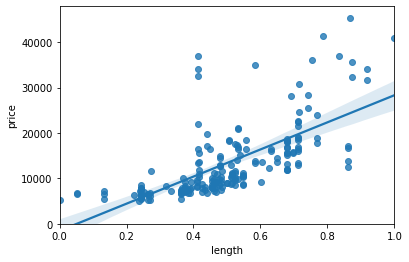

In [54]:
sns.regplot(x="length", y="price", data=df)
plt.ylim(0,)

(0.0, 47538.343384203334)

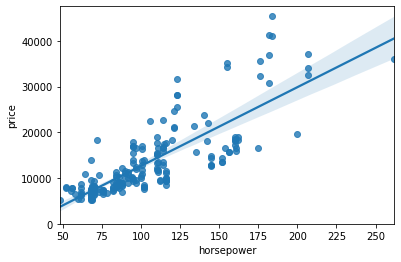

In [67]:
sns.regplot(x="horsepower", y="price", data=df)
plt.ylim(0,)

(0.0, 47758.34776933595)

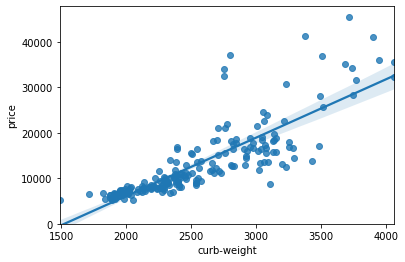

In [64]:
sns.regplot(x="curb-weight", y="price", data=df)
plt.ylim(0,)

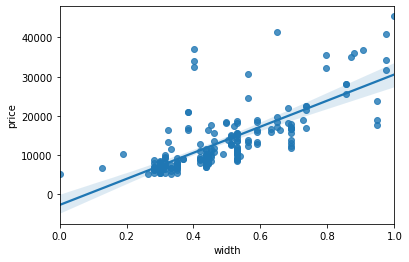

In [62]:
sns.regplot(x="width", y="price", data=df)

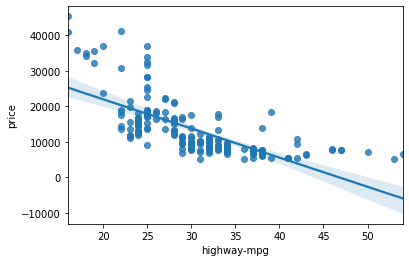

In [61]:
sns.regplot(x="highway-mpg", y="price", data=df)

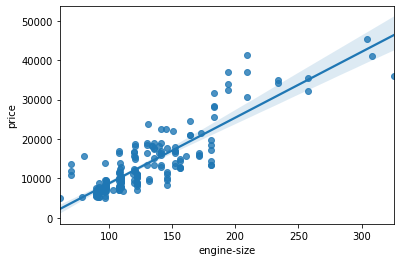

In [59]:
sns.regplot(x="engine-size", y="price", data=df)

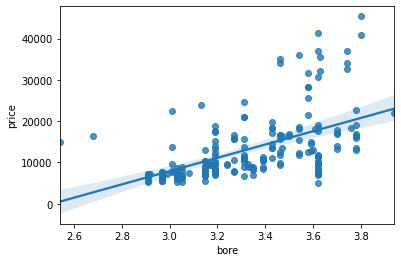

In [96]:
sns.regplot(x="bore", y="price", data=df)

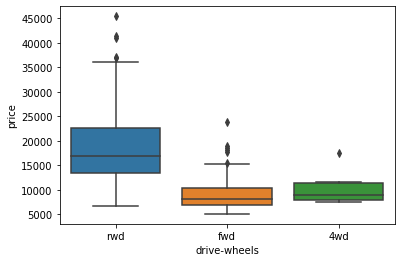

In [85]:
sns.boxplot(x="drive-wheels", y="price", data=df)

In [83]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("Pearson coef is", pearson_coef, " with a P-value of", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


In [88]:
pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
print("Pearson coef is", pearson_coef, "with a P-value of", p_value)

Pearson coef is 0.8105000308467994 with a P-value of 4.122472382878645e-48
Pearson coef is 0.8105000308467994 with a P-value of 4.122472382878645e-48


In [89]:
pearson_coef, p_value = stats.pearsonr(df["engine-size"], df["price"])
print("Pearson coef is", pearson_coef, "with a P-value of", p_value)

Pearson coef is 0.8723351674455185 with a P-value of 9.265491622198389e-64


In [91]:
pearson_coef, p_value = stats.pearsonr(df["highway-mpg"], df["price"])
print("Pearson coef is", pearson_coef, "with a P-value of", p_value)

Pearson coef is -0.704692265058953 with a P-value of 1.7495471144476358e-31


In [92]:
pearson_coef, p_value = stats.pearsonr(df["width"], df["price"])
print("Pearson coef is", pearson_coef, "with a P-value of", p_value)

Pearson coef is 0.7512653440522674 with a P-value of 9.200335510481516e-38


In [93]:
pearson_coef, p_value = stats.pearsonr(df["length"], df["price"])
print("Pearson coef is", pearson_coef, "with a P-value of", p_value)

Pearson coef is 0.6906283804483638 with a P-value of 8.016477466159556e-30


In [94]:
pearson_coef, p_value = stats.pearsonr(df["curb-weight"], df["price"])
print("Pearson coef is", pearson_coef, "with a P-value of", p_value)

Pearson coef is 0.8344145257702843 with a P-value of 2.189577238894065e-53


In [97]:
pearson_coef, p_value = stats.pearsonr(df["bore"], df["price"])
print("Pearson coef is", pearson_coef, "with a P-value of", p_value)

Pearson coef is 0.5431583759389862 with a P-value of 8.045454129104895e-17


Important variables:

*  Length
*  Width
*  Curb Weight
*  Engine size
*  Horsepower
*  Bore
*  Wheel base
*  Highway miles per gallon


# Model development

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [104]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train_x = np.array(train[["horsepower", "engine-size", "width", "curb-weight", "highway-mpg"]])
train_y = np.array(train[["price"]])
model.fit(train_x, train_y)

print("Coefs:", model.coef_)

Coefs: [[4.56661038e+01 8.50019372e+01 1.19532301e+04 9.32398337e-01
  1.54416790e+01]]


In [105]:
from sklearn.metrics import r2_score
test_x = np.array(test[["horsepower", "engine-size", "width", "curb-weight", "highway-mpg"]])
test_y = np.array(test[["price"]])
pred_y = model.predict(test_x)

print("RMSE: %.2f" % r2_score(test_y, pred_y))

RMSE: 0.76
